
 
# <u><font color = "brown" /> PRICING THE LAST EXPENSE BASED ON BOOK PERFOMANCE.</u>

**<u><font color = 'blue' /> Prepared by Pricing Team**</u>

### <font color = blue /> The objective of the above model is to achieve the  follows:
Using the current loss ratio for the corporate book we are working to achieve the following.

1. Price the last expense based on the perfomance to manage the loss ratio.
2. Uniform pricing for product with the same attributed
3. Monthly adjustment of prices based on new book perfomance.


#### 1.1 Importing data

**1.1.1 - importing directly using ms access data**

**1.1.2 - Export directly form access to csv files then load it.**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Last Expense.csv')
data.head()

,Policy_number,Scheme Name,RENEWAL DATE,Intermediary,Channel,Premium,Claim_amount,benefit,No_of_claims,Claim_ratio,Population,Average_age,Famsize,Occupation,Single_multiple,Rate_Applied
0,1,AHS 82/84,01-09-20,Stanbic Insurance Agency,bancassurance,158000,400000,200000,2,2.53,26,55,Extended,Welfare,Single,20.0
1,2,HANSARD,01-09-20,Stanbic Insurance Agency,bancassurance,64000,100000,200000,1,1.56,32,38,Extended,Welfare,Single,20.0
2,3,NANYUKI CENTRAL SDA,01-09-20,Stanbic Insurance Agency,bancassurance,42500,100000,200000,1,2.35,21,46,Extended,Welfare,Single,20.0
3,4,NIFTY INVESTMENT,01-09-20,Stanbic Insurance Agency,bancassurance,36000,100000,200000,1,2.78,18,47,Extended,Welfare,Single,20.0
4,5,SIAL,01-09-20,Stanbic Insurance Agency,bancassurance,260000,650000,200000,3,2.50,140,43,Extended,Welfare,Single,20.0


In [3]:
print("Size of dataset",data.shape)

Size of dataset (74, 16)


In [4]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [5]:
# based on the below we only have o
data_categorical = data[categorical_columns]

data_categorical.shape

(74, 7)

Based on the above we dont have any columns with categorical data.

In [6]:
data_numerical = data[numerical_columns]

data_numerical.shape

(74, 9)

### 2. Explanatory Data Analysis(EDA)

In [7]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [8]:
print('The categorical columns are ',categorical_columns)

print('The numerical columns are ',numerical_columns)

The categorical columns are  ['Scheme Name', 'RENEWAL DATE', 'Intermediary', 'Channel', 'Famsize', 'Occupation', 'Single_multiple']
The numerical columns are  ['Policy_number', 'Premium', 'Claim_amount', 'benefit', 'No_of_claims', 'Claim_ratio', 'Population', 'Average_age', 'Rate_Applied']


In [9]:
categorical_columns=data[['RENEWAL DATE', 'Intermediary', 'Channel','Famsize', 'Single_multiple' ]]

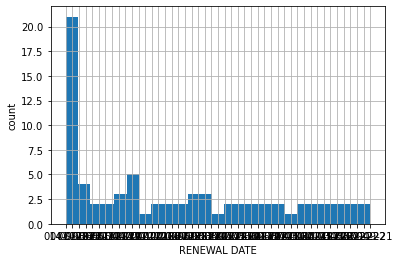

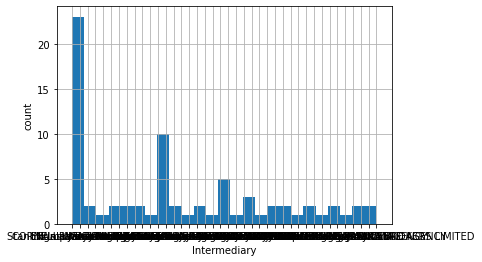

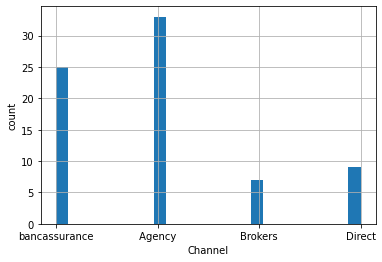

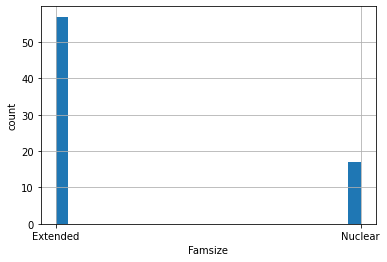

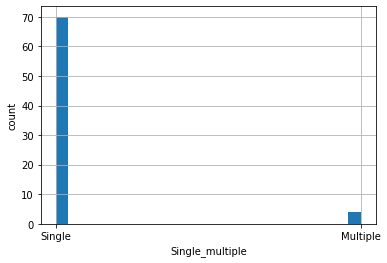

In [10]:
for i in categorical_columns:
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [11]:
numerical_columns=data[['benefit', 'No_of_claims', 'Claim_ratio', 'Population', 'Average_age', 'Rate_Applied']]

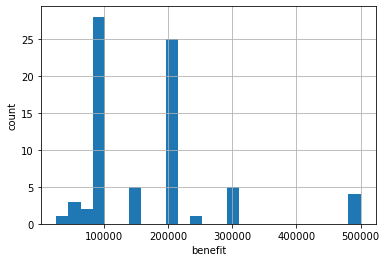

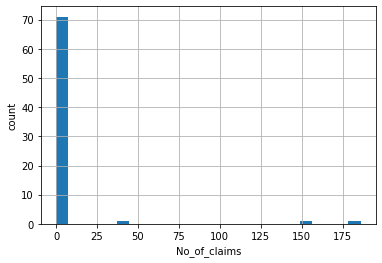

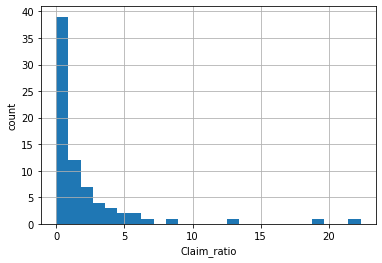

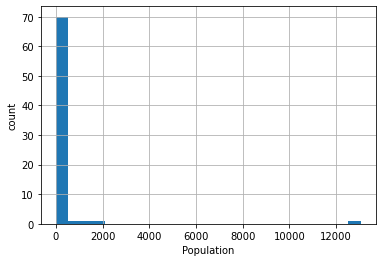

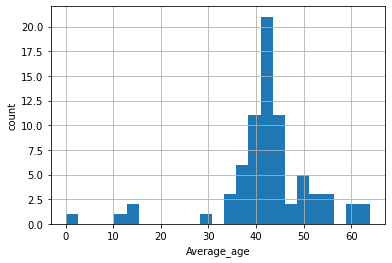

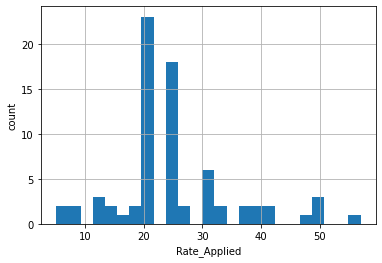

In [12]:
for i in numerical_columns:
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

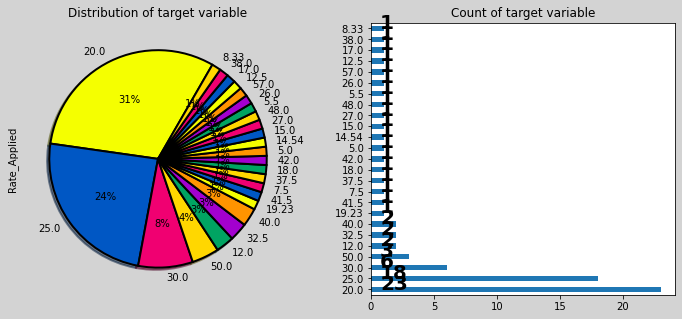

In [13]:
# Distribution of the target variable
%matplotlib inline
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data["Rate_Applied"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                                                             startangle = 60,
                                            wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data["Rate_Applied"].value_counts().plot(kind="barh")

for i,j in enumerate(data["Rate_Applied"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

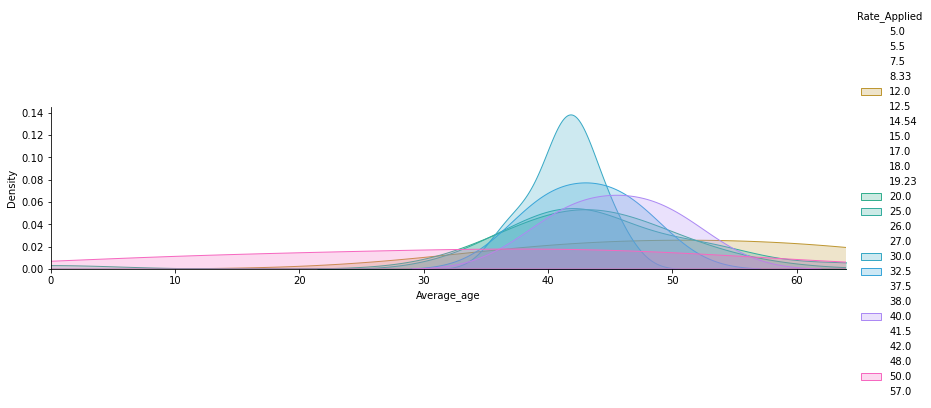

In [14]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data, hue = 'Rate_Applied', aspect=4 )
a.map(sns.kdeplot, 'Average_age', shade= True )
a.set(xlim=(0 , data['Average_age'].max()))
a.add_legend()

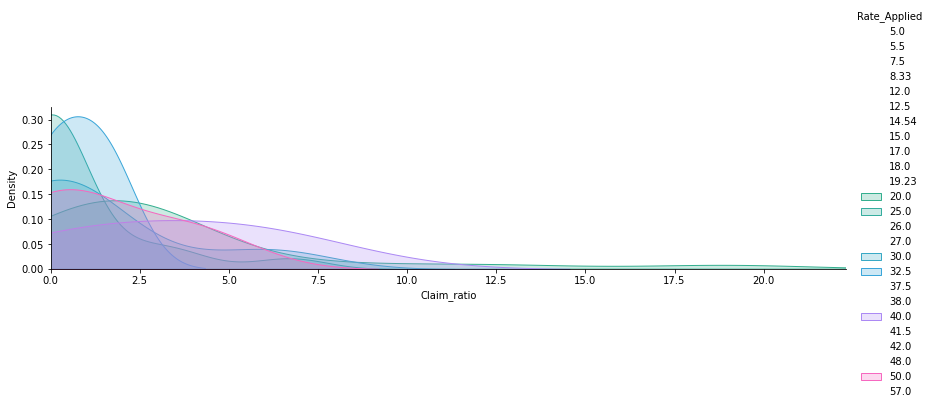

In [15]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data, hue = 'Rate_Applied', aspect=4 )
a.map(sns.kdeplot, 'Claim_ratio', shade= True )
a.set(xlim=(0 , data['Claim_ratio'].max()))
a.add_legend()

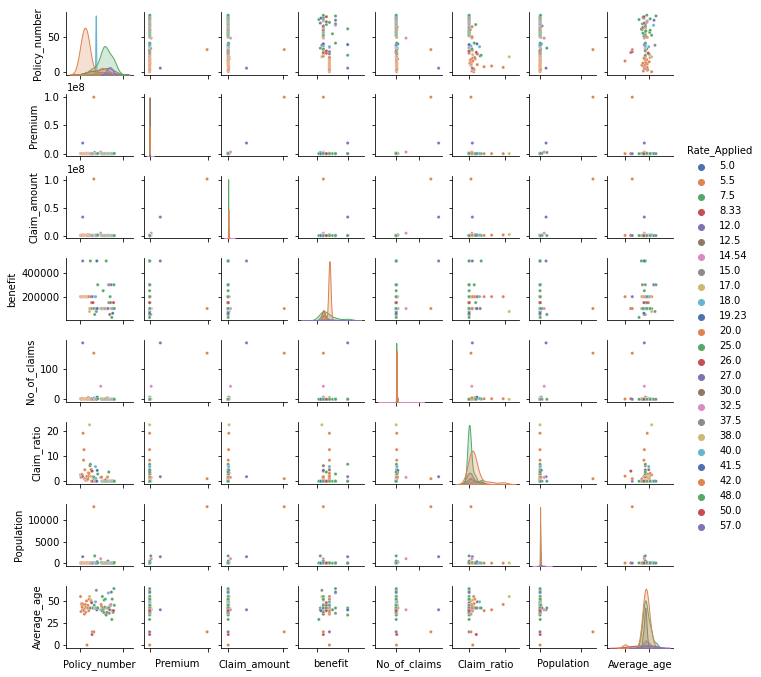

In [16]:
#pair plots of entire dataset
pp = sns.pairplot(data, hue = 'Rate_Applied', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

### 3. DATA CLEANING

In [17]:
data.isnull().sum()

Policy_number      0
Scheme Name        0
RENEWAL DATE       0
Intermediary       0
Channel            0
Premium            0
Claim_amount       0
benefit            0
No_of_claims       0
Claim_ratio        0
Population         0
Average_age        0
Famsize            0
Occupation         0
Single_multiple    0
Rate_Applied       0
dtype: int64

In [18]:
# Checking the duplication.
data.duplicated().sum()

0

In [19]:
# if in the following columns there is a nan we assume the scheme does not have any claim reported todate.

data['Claim_amount']=data['Claim_amount'].fillna(0)
data['No_of_claims']=data['No_of_claims'].fillna(0)

In [20]:
# incase the scheme average age is not indicated we used mean or k means 
data[ 'Average_age']=data['Average_age'].fillna(value=data['Average_age'].mean())

In [21]:
# We test the missing value with more than 50% we drop the column.
df_null_per=data.isnull().sum()/len(data)*100
df_null_per.sort_values(ascending = False)

Policy_number      0.0
Scheme Name        0.0
RENEWAL DATE       0.0
Intermediary       0.0
Channel            0.0
Premium            0.0
Claim_amount       0.0
benefit            0.0
No_of_claims       0.0
Claim_ratio        0.0
Population         0.0
Average_age        0.0
Famsize            0.0
Occupation         0.0
Single_multiple    0.0
Rate_Applied       0.0
dtype: float64

In [22]:
# Convert the column in date and extract months.
import datetime as dt
data['RENEWAL DATE'] = pd.to_datetime(data['RENEWAL DATE'])
data['Month'] = data['RENEWAL DATE'].dt.month
data['Day']=data['RENEWAL DATE'].dt.day
data['Year']=data['RENEWAL DATE'].dt.year

In [23]:
data = data.drop(['RENEWAL DATE'],axis=1)

### 3. Feature Engineering:

In [24]:
data.describe()

,Policy_number,Premium,Claim_amount,benefit,No_of_claims,Claim_ratio,Population,Average_age,Rate_Applied,Month,Day,Year
count,74.000000,7.400000e+01,7.400000e+01,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,40.175676,1.782487e+06,2.089378e+06,170743.243243,6.094595,2.013243,283.621622,42.256757,24.981081,3.621622,11.418919,2020.810811
std,24.139638,1.167327e+07,1.246142e+07,102578.678231,27.946705,3.856357,1530.259909,10.129383,10.350910,3.455005,7.673128,0.634093
min,1.000000,1.125000e+04,0.000000e+00,25000.000000,0.000000,0.000000,5.000000,0.000000,5.000000,1.000000,1.000000,2020.000000
25%,19.250000,5.008000e+04,0.000000e+00,100000.000000,0.000000,0.000000,17.250000,39.250000,20.000000,1.000000,7.000000,2020.000000
50%,37.500000,8.787650e+04,1.000000e+05,150000.000000,0.500000,0.730000,26.000000,42.000000,25.000000,1.000000,9.000000,2021.000000
75%,61.750000,2.318000e+05,2.000000e+05,200000.000000,2.000000,2.262500,68.000000,46.000000,29.250000,6.000000,15.000000,2021.000000
max,80.000000,9.911783e+07,1.024890e+08,500000.000000,186.000000,22.320000,13044.000000,64.000000,57.000000,12.000000,30.000000,2022.000000


We will separate categorical and numerical variables using their data types to identify them, as we saw previously that object corresponds to categorical columns (strings). We make use of make_column_selector helper to select the corresponding columns.

In [25]:
# Converge the months to quarter.

def quarter(row):
    """ segmenting the data into quarter.
    
    """
    if row['Month'] < 3:
        return '1st Quarter'
    elif row['Month'] >= 3 and row['Month'] < 6:
        return '2nd Quarter'
    elif row['Month'] >= 6 and row['Month'] < 9:
        return '3rd Quarter'
    else:
        return '4th Quarter'
data['Quarter'] = data.apply(quarter, axis=1)

one-hot encoding will be applied to categorical columns. Besides, we use handle_unknown="ignore" to solve the potential issues due to rare categories.
numerical scaling numerical features which will be standardized.

In [26]:
# Converge the months to quarter.

def Rate_Applied(row):
    """ segmenting the data into quarter.
    
    """
    if row['Rate_Applied'] < 16:
        return 15
    elif row['Rate_Applied'] >= 16 and row['Rate_Applied'] < 21:
        return 20
    elif row['Rate_Applied'] >= 21 and row['Rate_Applied'] < 26:
        return 25
    elif row['Rate_Applied'] >= 26 and row['Rate_Applied'] < 31:
        return 30
    else:
        return 40
data['Rate_Applied'] = data.apply(Rate_Applied, axis=1)

In [27]:
data.Rate_Applied.nunique()

5

In [28]:
def Rate_Applied(row): 
    
    """ We are trying to introduce loading on scheme those loss ratio is greater than 65%.
    
    Loss Ratio:
        If the loss ratio is   Claim Ratio           Loading applied
                             500% and above.         100%
                             200% < X < 499%         50% 
                             150% < X < 199%         40%
                             120% < X < 149%         30%
                             100% < X < 119%         20%
                             65%  < X < 99%          10%       
    """
    
    if row['Claim_ratio'] >= 5.0:
        return row['Rate_Applied']*2.0
    
    elif row['Claim_ratio'] >= 2.0:
        return row['Rate_Applied']*1.5
    
    elif row['Claim_ratio'] >= 1.5:
        return row['Rate_Applied']*1.4
    
    elif row['Claim_ratio'] >= 1.2:
        return row['Rate_Applied']*1.3
    
    elif row['Claim_ratio'] >= 1.0:
        return row['Rate_Applied']*1.2
    
    elif row['Claim_ratio'] >= 0.65:
        return row['Rate_Applied']*1.1
    
    else:
        return row['Rate_Applied']*1.0
data['Rate_Applied'] = data.apply(Rate_Applied, axis=1)

In [29]:
data['Rate_Applied'].mean()

31.445945945945947

In [30]:
data['Single_multiple'].unique()

array(['Single', 'Multiple'], dtype=object)

In [31]:
data['Channel'].unique()

array(['bancassurance', ' Agency ', 'Brokers', 'Direct'], dtype=object)

In [32]:
data['Famsize'].unique()

array(['Extended', 'Nuclear'], dtype=object)

In [33]:
data['Occupation'].unique()

array(['Welfare', 'Employer'], dtype=object)

In [34]:
data= data.drop(columns = ['Premium','Scheme Name','Intermediary','Policy_number','Day','Quarter','Policy_number','Year','No_of_claims','Claim_amount'], axis = 1)

In [35]:
# We will do one hot encoding for the following columns.

# Replacing channel
data.replace({"bancassurance": 0, ' Agency ': 1, 'Brokers': 2, 'Direct': 3},inplace = True)
data.replace({'Single':0,'Multiple':1},inplace=True)
data.replace({'Extended':0, 'Nuclear':1},inplace=True)
data.replace({'Welfare':0, 'Employer':1},inplace=True)

In [36]:
# one hot encoding - Family 
'''
Type_family = data[['Nuclear/Extended']]

Type_family = pd.get_dummies(Type_family, drop_first= True)

Type_family.head()

'''

"\nType_family = data[['Nuclear/Extended']]\n\nType_family = pd.get_dummies(Type_family, drop_first= True)\n\nType_family.head()\n\n"

In [37]:
# one hot encoding - No_claims 
'''
No_claims = data[['Single/multiple']]

No_claims = pd.get_dummies(No_claims, drop_first= True)

No_claims.head()
'''

"\nNo_claims = data[['Single/multiple']]\n\nNo_claims = pd.get_dummies(No_claims, drop_first= True)\n\nNo_claims.head()\n"

In [38]:
'''
# converting the categorical data which are suppose to be ordered 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Quarter'] = le.fit_transform(data['Quarter'])
data['Day']=le.fit_transform(data['Day'])
'''

"\n# converting the categorical data which are suppose to be ordered \nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndata['Quarter'] = le.fit_transform(data['Quarter'])\ndata['Day']=le.fit_transform(data['Day'])\n"

In [39]:
## convert float dtypes to int
#data['Premium'] = data['Premium'].astype('int')
data['Average_age'] = data['Average_age'].astype('int')
data['Rate_Applied']= data['Rate_Applied'].astype('int')

**Feature Selecting**

**1.1 Heatmap - Correlation Matrix:**
    
We are trying to see how each variable relate to each other and the how it relate to target variable.

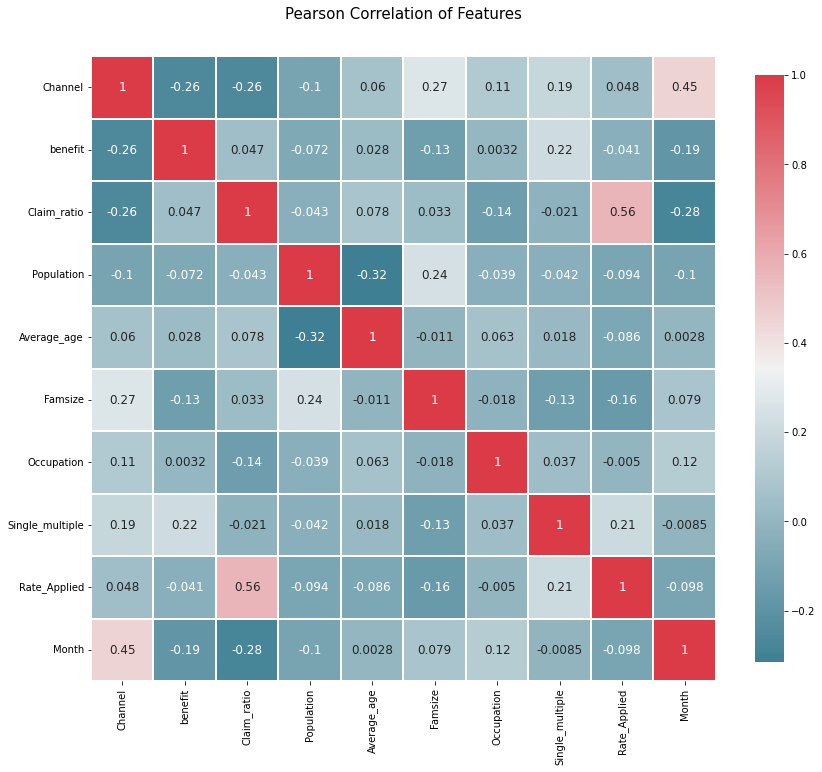

In [40]:
#correlation heatmap of dataset
def correlation_heatmap(data):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        data.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data)

**Feature Importance**

We want to indentify any column that have 0 feature importance and drop it.

In [41]:
from sklearn.preprocessing import StandardScaler

X = data.drop(["Rate_Applied"],1).select_dtypes(exclude=['object'])
cols = X.columns
y = data["Rate_Applied"]

# Standardizing the features
#X = StandardScaler().fit_transform(X)

In [42]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [43]:
print(selection.feature_importances_)

[0.08890246 0.0474899  0.42007984 0.13596756 0.12033422 0.07607401
 0.01645179 0.03598866 0.05871156]


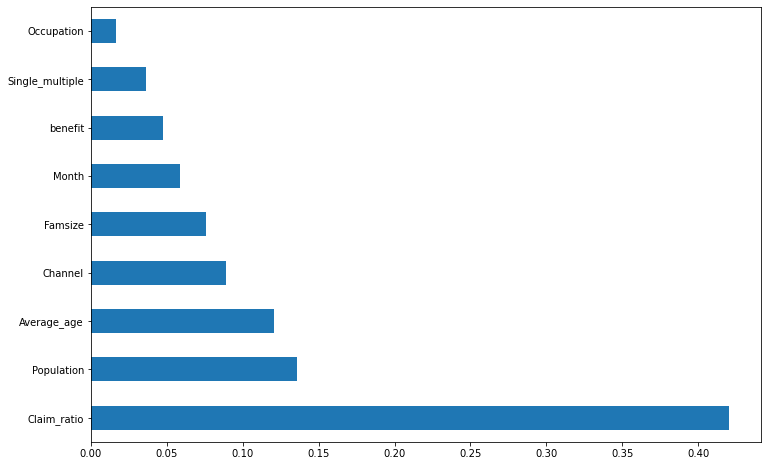

In [44]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [45]:
feat_importances.sort_values(ascending = False)

Claim_ratio        0.420080
Population         0.135968
Average_age        0.120334
Channel            0.088902
Famsize            0.076074
Month              0.058712
benefit            0.047490
Single_multiple    0.035989
Occupation         0.016452
dtype: float64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Channel          74 non-null     int64  
 1   benefit          74 non-null     int64  
 2   Claim_ratio      74 non-null     float64
 3   Population       74 non-null     int64  
 4   Average_age      74 non-null     int32  
 5   Famsize          74 non-null     int64  
 6   Occupation       74 non-null     int64  
 7   Single_multiple  74 non-null     int64  
 8   Rate_Applied     74 non-null     int32  
 9   Month            74 non-null     int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 5.3 KB


### 4. MODELLING USING VARIOUS REGRESSION METHODS

### 4.1 Predicting using CatBoost Regression.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [48]:
from sklearn.preprocessing import StandardScaler

X = data.drop(["Rate_Applied"],1).select_dtypes(exclude=['object'])
cols = X.columns
y = data["Rate_Applied"]

# Standardizing the features
#X = StandardScaler().fit_transform(X)

In [49]:
# Normalizing the feature variables
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled

array([[0.00000000e+00, 3.68421053e-01, 1.13351254e-01, 1.61055296e-03,
        8.59375000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.68421053e-01, 6.98924731e-02, 2.07071094e-03,
        5.93750000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.68421053e-01, 1.05286738e-01, 1.22708797e-03,
        7.18750000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.68421053e-01, 1.24551971e-01, 9.97008973e-04,
        7.34375000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 3.68421053e-01, 1.12007168e-01, 1.03535547e-02,
        6.71875000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 8.10931900e-02, 1.14502646e-01,
        6.25000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.7

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(51, 9) (51,)
(23, 9) (23,)


In [51]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
  # Training the model
  ct=CatBoostRegressor(iterations=10000, 
                    loss_function='MAE',  
                       
                    logging_level='Silent',
                    depth = i
                    )
ct.fit(X_train, y_train)
    

  # Making predictions
preds = ct.predict(X_test)
predictions.append(preds)

# Averaging the predictions
preds = np.mean(predictions, axis = 0)

In [52]:
# Model Evaluation 
from sklearn.metrics import mean_absolute_error 
Accuracy = ct.score(X_train,y_train)
print('Accuracy  {} '.format(Accuracy))

Accuracy  0.999999999999998 


### 4.2 Prediction using XGBoost.

In [53]:
from xgboost import XGBRegressor

# create an xgboost regression model
model_xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_xgb.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_test, y_test)], 
             verbose=False)
# Model Prediction
cost_predict = model_xgb.predict(X_test)

In [54]:
# Model Evaluation.
#Checking accuracy on test data
accuracy = model_xgb.score(X_train,y_train)
print(accuracy)

0.9040557797040052


### 4.3 Prediction using Linear Regression.

In [55]:
# model fitting
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
# Model prediction 
#Checking accuracy on test data
accuracy = lin_reg.score(X_train,y_train)
print(accuracy)

0.6422803043703373


### 4.4 Random Forest 

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = reg_rf.predict(X_test)

In [59]:
reg_rf.score(X_train, y_train)

0.886766441200282

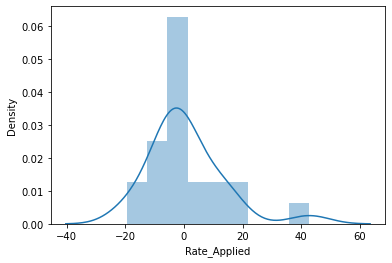

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

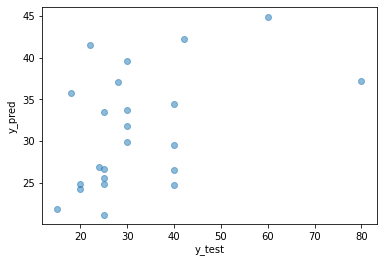

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

**1.1 Hyperparameter Tuning for using RandomForest.**

In [62]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [65]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [66]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [67]:
prediction = rf_random.predict(X_test)

In [68]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 9.005759714104082
MSE: 153.08828644717616
RMSE: 12.372885130282919


**1.2 Hyperparameter Tuning for Catboost.**

In [69]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [70]:
model_ct=RandomizedSearchCV(grid,
                            X=X_train,
                            y=y_train,
                            plot = True)

TypeError: __init__() got an unexpected keyword argument 'X'

#### Saving the Model

In [71]:
import pickle
# open a file, where you ant to store the data
file = open('pricing_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [72]:
model = open('pricing_rf.pkl','rb')
forest = pickle.load(model)

In [73]:
y_prediction = forest.predict(X_test)

In [74]:
metrics.r2_score(y_test, y_prediction)

0.24406138774800523